## Imports

#### Importing necessary modules

In [1]:
import pandas as pd

from OptionsChain import OptionsChain
from CallObject import Call
from PutObject import Put
import datetime as dt

from OptionStrategyObject import OptionStrategy
from OpportunityScreener import OpportunityScreener

## Test Data

#### Setting up fake test data for speed

In [ ]:
underlying_symbol = "AAPL"
underlying_price = 197

In [ ]:
info_series_dict = {}
info_series_dict["expirationDate"] = dt.datetime.today()+dt.timedelta(10)
info_series_dict["strike"] = 200
info_series_dict["bid"] = 2
info_series_dict["ask"] = 4
info_series_dict["volume"] = 200
info_series_dict["impliedVolatility"] = 50
info_series = pd.Series(info_series_dict)

is_long = True
info_series

## Testing OptionsChain Object

#### Using the OptionsChain object to get real data

In [ ]:
import time

if True:
    
    start = time.time()
    
    option_chain = OptionsChain(underlying_symbol, underlying_price)
    call_df = option_chain.call_chain
    put_df = option_chain.put_chain
    
    end = time.time()

In [ ]:
print(end - start)

#### Testing the filtering method

In [ ]:
option_chain.call_chain.dtypes

In [ ]:
is_long = True
option_type = 'CALL'

params_dict = {'strike':('>', 300), 'Description':('c', 'ITM')}

In [ ]:
test_list = option_chain.get_filtered_options_list(params_dict, option_type, is_long)

In [ ]:
for option in test_list:
    print(option.type, option.strike_price, option.description)

#### More filtering tests

In [ ]:
is_long_1 = True
option_type_1 = 'Put'
params_dict_1 = {'Time Interval (days)':[('<', 30), ('>', 8)], 
                 'Description':[('in', 'ITM, ATM')]}

is_long_2 = False
option_type_2 = 'CALL'
params_dict_2 = {'Time Interval (days)':('<', 10), 'Description':('c', 'OTM')}

In [ ]:
list_1 = option_chain.get_filtered_options_list(params_dict_1, option_type_1, is_long_1)
list_2 = option_chain.get_filtered_options_list(params_dict_2, option_type_2, is_long_2)

## Testing the Call and Put Objects

#### Initializing the Call and Put Instances

In [ ]:
test_call = Call(underlying_symbol, underlying_price, info_series, is_long)
test_put = Put(underlying_symbol, underlying_price, info_series, is_long)

#### Testing the ouput summary stats methods

In [ ]:
test_call.output_summary_stats()
print("-----------------------")
test_put.output_summary_stats()

#### Testing the Visualization Methods

In [ ]:
#test_call.visualize_profit_graph_new_price()
test_call.visualize_profit_graph_price_change()

#test_put.visualize_profit_graph_new_price()
test_put.visualize_profit_graph_price_change()

## Testing Spreads

In [ ]:
underlying_symbol = "XYZ"
underlying_price = 50

In [ ]:
info_series_dict_1 = {}
info_series_dict_1["expirationDate"] = dt.datetime.today()+dt.timedelta(10)
info_series_dict_1["strike"] = 50
info_series_dict_1["bid"] = 3
info_series_dict_1["ask"] = 3
info_series_dict_1["volume"] = 200
info_series_dict_1["impliedVolatility"] = 50
info_series_1 = pd.Series(info_series_dict_1)

is_long_1 = True

In [ ]:
info_series_dict_2 = {}
info_series_dict_2["expirationDate"] = dt.datetime.today()+dt.timedelta(15)
info_series_dict_2["strike"] = 50
info_series_dict_2["bid"] = 3
info_series_dict_2["ask"] = 3
info_series_dict_2["volume"] = 200
info_series_dict_2["impliedVolatility"] = 50
info_series_2 = pd.Series(info_series_dict_2)

is_long_2 = True

In [ ]:
long_call = Call(underlying_symbol, underlying_price, info_series_1, is_long_1)
long_put = Put(underlying_symbol, underlying_price, info_series_2, is_long_2)

In [ ]:
strategy_name = "Long Straddle"
direction = "Bear"
option_legs = [long_call, long_put]

In [ ]:
test_spread = OptionStrategy(strategy_name, direction, underlying_symbol, underlying_price, option_legs)

In [ ]:
test_spread.output_summary_stats()

In [ ]:
price_range = (45, 55)
test_table = test_spread.get_profit_loss_table(price_range)
test_table

In [ ]:
test_spread.visualize_profit_graph_new_price()

In [ ]:
test_spread.visualize_profit_graph_price_change()

## Testing Opportunity Screener

In [2]:
underlying_symbol = "AAPL"
underlying_price = 318.89
target_price = 350
timeframe = 8
options_chain = OptionsChain(underlying_symbol, underlying_price)

expirationDate                  object
strike                         float64
bid                            float64
ask                            float64
volume                         float64
impliedVolatility              float64
Underlying Price               float64
Description                     object
Premium                        float64
Intrinsic Value                float64
Time Value                     float64
Expiration Date         datetime64[ns]
Time Interval (days)             int64
dtype: object


In [3]:
test_screener = OpportunityScreener(options_chain, target_price, timeframe)    

In [4]:
df = test_screener.output_summary_stats()

0 -------------
Bear Put Spread: 0
Runtime: 0.013039112091064453
1 -------------
Bear Call Spread: 1
Runtime: 0.01689004898071289
2 -------------
Bull Put Spread: 0
Runtime: 0.011140823364257812
3 -------------
Bull Call Spread: 0
Runtime: 0.011764049530029297
4 -------------
Long Straddle: 0
Runtime: 0.0123291015625
5 -------------
Long Strangle: 0
Runtime: 0.012511014938354492
6 -------------
Iron Condor: 0
Runtime: 0.02422022819519043
7 -------------
Iron Butterfly: 0
Runtime: 0.023067235946655273


In [5]:
df

,Spread,Premium,Risk:Reward,Net Premium,Capital Committed,Max Profit,Max Loss,Legs
Strategy Name,,,,,,,,
Bear Call Spread,<OptionStrategyObject.OptionStrategy object at...,"[163.2, -183.35]",1.0,-20.15,0,20.15,0.15,"[AAPL200917C0012500, AAPL200917C0010500]"


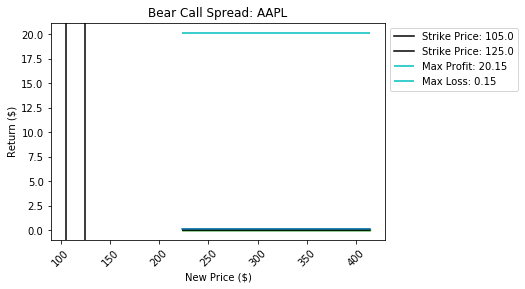

In [6]:
for spread in df["Spread"].tolist():
    spread.visualize_profit_graph_new_price()

- Look into the risk:reward ratio and make sure its working properly. Above graphs are funky.
- Also look into why some of the graphs aren't graphing everything and are incomplete.
- Finish Commenting everything
- Make docstring